In [2]:
import sys
sys.path.append("../../")
import math as m
import random
import matplotlib.pyplot as plt
import numpy as np

0.203 203


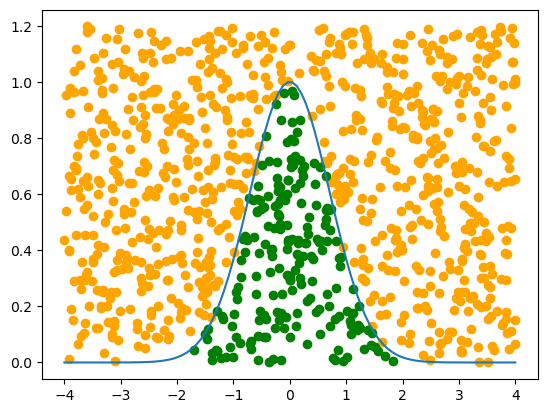

efficiency is:  0.203


'\ndef rejection_monte_carlo_gauss(n,x,sigma,mu): #i must add "funz" in the argoments because it\'s wrong when i\'ll do n_y <= gaussian_function(n_x)\n    count_within_region = 0\n    vector_x = []\n    vector_y = []\n    # Define parameters\n    #mu = 0  # Mean\n    #sigma = 1  # Standard deviation\n\n    # Generate data points for x-axis\n    #x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)\n\n    # Calculate the probability density function (PDF) values for the given parameters\n    def gaussian_function(x):\n        return np.exp(- ((x - mu) / sigma)**2) #-0.5*\n    y=[]\n    for i in range(len(x)):\n        y.append(np.exp(- ((x[i] - mu) / sigma)**2)) #(1/(sigma * np.sqrt(2 * np.pi))) *\n    #plt.plot(x,y,color=\'magenta\') \n    #now i introduce a variable that count how many point is within the box(in this case gaussain function)\n    number = 0\n    for _ in range(n):\n        n_x = random.uniform(min(x), max(x))  # Generate a random x-coordinate\n        n_y = random.uniform(

In [3]:
#create a proposed distribuction:
#Case: FLAT FUNCTION
const = [1,2]
#y = flat_function
#in x axis:
x = np.linspace(-4,4,100)
y = np.full(100,1.2)

#Function that I want to compute rejection montecarlo
#Case: GAUSSIAN FUNCTION
def gaussian_function(x):
    return np.exp(-x**2)
pdf=[]
for i in range(len(x)):
    pdf.append(gaussian_function(x[i]))

#compute integral with rejection montecarlo:

#x e y define the box which i use to generate random numbers
#pdf is the function which i want to calculate the integral
out_distrib_x=[]
out_distrib_y=[]
def rejection_monte_carlo_flat(n,x,y,pdf): 
    count_within_region = 0
    vector_x = []
    vector_y = []
    #now i introduce a variable that count how many point is within the box(in this case flat function)
    number = 0
    for _ in range(n):
        n_x = random.uniform(min(x), max(x))  # Generate a random x-coordinate
        n_y = random.uniform(0, max(y))  # Generate a random y-coordinate
        #print(n_y)

        if n_y <= pdf(n_x):
            count_within_region += 1
            vector_x.append(n_x)
            vector_y.append(n_y)
            number = number + 1
            #print(n_x,n_y)
        else:
            out_distrib_x.append(n_x)
            out_distrib_y.append(n_y)

    integral_estimate = count_within_region / n
    return integral_estimate, vector_x, vector_y, number




# Number of random points to generate
num_points = 1000

# Estimate the integral with a flat function
integral_estimate, vector_x, vector_y, number = rejection_monte_carlo_flat(num_points,x,y,gaussian_function)
print(integral_estimate, number)
#now i estimate the integral with a gaussian function
#integral_estimate_gauss, vec_x, vec_y, num = rejection_monte_carlo_gauss(num_points,x,2,0)
#print(integral_estimate_gauss, num)

fig, ax = plt.subplots()

#ax.plot(x, y) #label='Flat function'
ax.plot(x, pdf) #label='Gaussian distribuction'
plt.scatter(out_distrib_x, out_distrib_y, color='orange',marker='o')
plt.scatter(vector_x, vector_y, color='green',marker='o')
#plt.scatter(vec_x, vec_y, color = 'green', marker='o')
#ax.legend()
plt.show()
print("efficiency is: ",len(vector_x)/(len(vector_x) + len(out_distrib_x)))

#Rejection montecarlo with proposed distribution is Gaussian distribution
'''
def rejection_monte_carlo_gauss(n,x,sigma,mu): #i must add "funz" in the argoments because it's wrong when i'll do n_y <= gaussian_function(n_x)
    count_within_region = 0
    vector_x = []
    vector_y = []
    # Define parameters
    #mu = 0  # Mean
    #sigma = 1  # Standard deviation

    # Generate data points for x-axis
    #x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

    # Calculate the probability density function (PDF) values for the given parameters
    def gaussian_function(x):
        return np.exp(- ((x - mu) / sigma)**2) #-0.5*
    y=[]
    for i in range(len(x)):
        y.append(np.exp(- ((x[i] - mu) / sigma)**2)) #(1/(sigma * np.sqrt(2 * np.pi))) *
    #plt.plot(x,y,color='magenta') 
    #now i introduce a variable that count how many point is within the box(in this case gaussain function)
    number = 0
    for _ in range(n):
        n_x = random.uniform(min(x), max(x))  # Generate a random x-coordinate
        n_y = random.uniform(0, max(y))  # Generate a random y-coordinate
        #print(n_y)

        if n_y <= gaussian_function(n_x):
            count_within_region += 1
            vector_x.append(n_x)
            vector_y.append(n_y)
            number = number+1
            #print(n_x,n_y)

    integral_estimate = count_within_region / n
    return integral_estimate, vector_x, vector_y, number
'''




ND DIMENSION

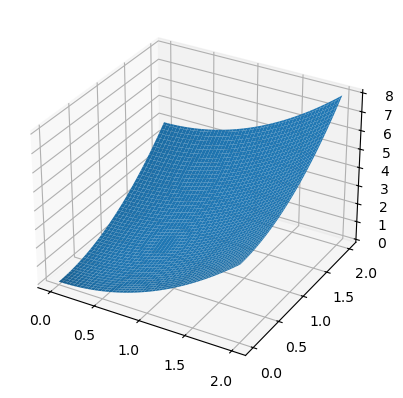

In [4]:
def Nd_distribution(*args): #3D
    z = sum(arg ** 2 for arg in args) #i put this proof function, but in general i can put all functions that i want
    return z

# Generate data
X = np.linspace(0, 2, 100)
Y = np.linspace(0, 2, 100)
x, y = np.meshgrid(X, Y)

z=Nd_distribution(x,y)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)


# Display plot
plt.show()

In [6]:
#Proposal distribution


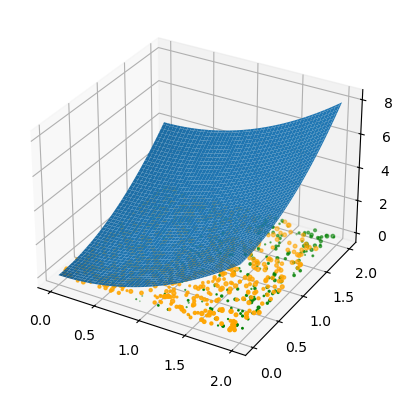

In [37]:
#vector that i can use to put points out of target distribution (Nd_distribution)
out_distribNd_x=[]
out_distribNd_y=[]
out_distribNd_z=[]
#vector that i can use to put points in the target distribution
vect_x = []
vect_y = []
vect_z = []

#define the method of rejection_monte_carlo
def rejection_monte_carlo_flat(n_samples,x,y,z,pdf): 
    count_within_region = 0
    #now i introduce a variable that count how many point is within the box(in this case flat function)
    number = 0
    for _ in range(n_samples):
        n_x = random.uniform(min(x), max(x))  # Generate a random x-coordinate
        n_y = random.uniform(min(y), max(y))  # Generate a random y-coordinate
        n_z = random.uniform(0,max(z))
        #print(n_y)

        if n_z <= pdf(n_x,n_y):
            count_within_region += 1
            vect_x.append(n_x)
            vect_y.append(n_y)
            vect_z.append(n_z)
            number = number + 1
            #print(n_x,n_y)
        else:
            out_distribNd_x.append(n_x)
            out_distribNd_y.append(n_y)
            out_distribNd_z.append(n_z)

    return number

#point of a flat distribution:
#if 1D i have x and y, but in Nd i have N+1 variables
ascisse = np.linspace(0,2,100)
ordinate = np.linspace(0,2,100)
zeta = np.full(100,8.5)

number = rejection_monte_carlo_flat(num_points,ascisse,ordinate,zeta,Nd_distribution)

#fig,ax = plt.subplots()
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#ax.plot(x, y) #label='Flat function'
#ax.plot(x, pdf) #label='Gaussian distribuction'
plt.scatter(out_distribNd_x, out_distribNd_y, out_distribNd_z, color='orange',marker='o')
plt.scatter(vect_x, vect_y, vect_z, color='green',marker='o')
#plt.scatter(vec_x, vec_y, color = 'green', marker='o')
#ax.legend()
#plt.show()
#print("efficiency is: ",len(vector_x)/(len(vector_x) + len(out_distrib_x)))

# Create 3D plot
ax.plot_surface(x, y, z)

# Rotate the plot
#ax.view_init(270, angle)  # Change the view angle

plt.show()